In [209]:
import pandas as pd
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [211]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

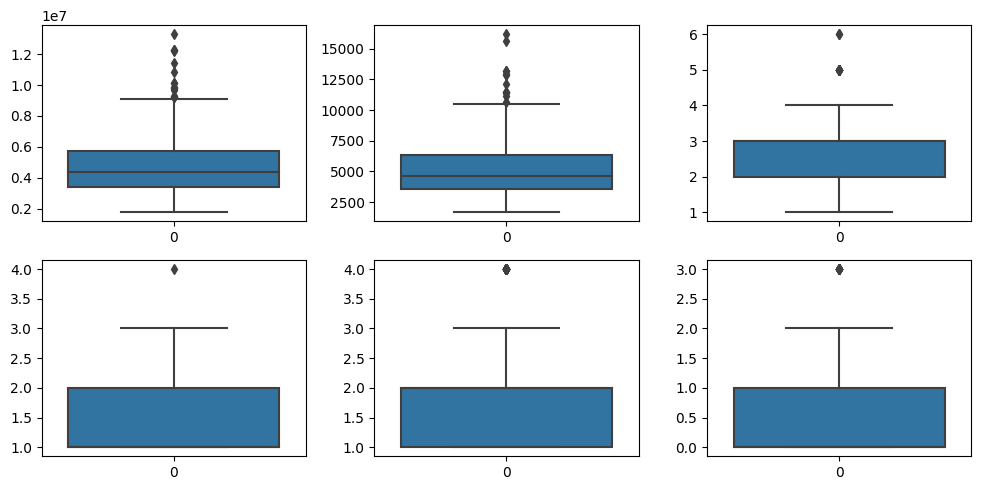

In [212]:
# Outlier Analysis
import seaborn as sns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df['price'], ax = axs[0,0])
plt2 = sns.boxplot(df['area'], ax = axs[0,1])
plt3 = sns.boxplot(df['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(df['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(df['stories'], ax = axs[1,1])
plt3 = sns.boxplot(df['parking'], ax = axs[1,2])

plt.tight_layout()

In [213]:
#outlier remover
import seaborn as sns
def outLier_remover(dataset, column,max_quantile,min_quantile):
    max=dataset[column].mean() + max_quantile*dataset[column].std()
    min=dataset[column].mean() - min_quantile*dataset[column].std()
    print("Highest allowed",max)
    print("Lowest allowed",min)


    print("len of outlier",len(dataset[(dataset[column] > max) | (dataset[column] < min)]))
    df= dataset[(dataset[column] < max) & (dataset[column] > min)]
    import matplotlib.pyplot as plt
    plt.figure(figsize=(16,8))

    plt.subplot(2,2,2)
    sns.boxplot(dataset[column])

    plt.subplot(2,2,4)
    sns.boxplot(df[column])

    plt.show()

    return df

Highest allowed 15567.218192445926
Lowest allowed 1895.3297506404656
len of outlier 5


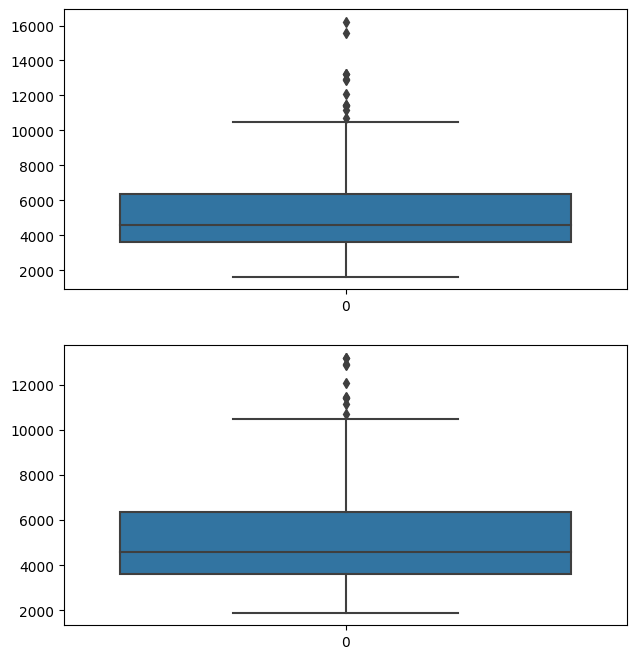

In [214]:
y=outLier_remover(df,"area",4.8,1.5)
df=y


In [215]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [216]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy as np

categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
area_cols = ['area']  # Assuming these are the area columns to be normalized


# Create ColumnTransformer
transformer = ColumnTransformer(transformers= [
    ('one_hot', OneHotEncoder(sparse=False, dtype=np.int32), categorical_cols),
    ('scaler', StandardScaler(), area_cols)
], remainder='passthrough')


In [217]:
x=transformer.fit_transform(X)

c:\Users\ABC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [218]:
import joblib
joblib.dump(transformer, 'data.joblib')

['data.joblib']

In [219]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

In [220]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

# Fitting the regressor on the training data
rf_regressor.fit(X_train, y_train)

predictions = rf_regressor.predict(X_test)

# Calculating metrics (MSE and R-squared)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 589481639621.4666
R-squared: 0.7909388537283303


In [221]:
joblib.dump(rf_regressor, 'data.joblib')


['data.joblib']